In [ ]:
%pip install keras
%pip install tensorflow

In [ ]:
%pip install scikit-learn

In [25]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [26]:
mnist = load_digits()
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [29]:
# Extract features (images) and labels
images, labels = mnist.data, mnist.target

# Convert labels to integers
labels = labels.astype(np.uint8)

# Filter the dataset to include only 0s and 1s
filter_mask = (labels == 0) | (labels == 1)

images_filtered = images[filter_mask]
labels_filtered = labels[filter_mask]

In [34]:
labels_per = np.where(labels_filtered == 1, 1, -1)

In [68]:
def predict(X):
    return np.where(np.dot(np.transpose(weight),X) >= 0.0, 1, -1)


def perceptron(feature, label):
    weight = np.zeros(feature.shape[1])
    #print(weight)
    errors = []
    while True:
        err = 0
        for x, y in zip(feature,label):
            ###The lecture from Cornell and the book we talk about approach and updat the weight different this code is follow what the prof said in the lecture video at cornell
            if y*(np.dot(np.transpose(weight),x)) <= 0:
                weight = weight + y * x
                #print(weight)
                err += 1
            #print(weight)
        print(err)
        errors.append(err)      
        if errors[-1] == 0:
            break
    print('Number of errors each iteration:' , errors)
    return weight

In [36]:
weight = perceptron(images_filtered, labels_per)
weight

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
6
5
0
Number of errors each iteration: [6, 5, 0]


array([  0.,   0.,  -1., -12.,   3.,  35.,   4.,   0.,   0.,   3., -16.,
        -7.,  20., -10.,   0.,   0.,   2.,  16., -12.,  47.,  74., -16.,
       -14.,   0.,   1.,  12.,   1.,  45.,  57., -15., -26.,   0.,   0.,
       -19., -42.,  45.,  53., -14., -22.,   0.,   0., -10., -45.,  38.,
        21., -17., -13.,   0.,   0.,  -2., -41.,   5.,   6.,  -4.,   4.,
         0.,   0.,   0.,  -6., -11.,   7.,  42.,   7.,   0.])

In [42]:
predict(images_filtered[4])

array(-1)

In [41]:
labels_filtered[4]

0

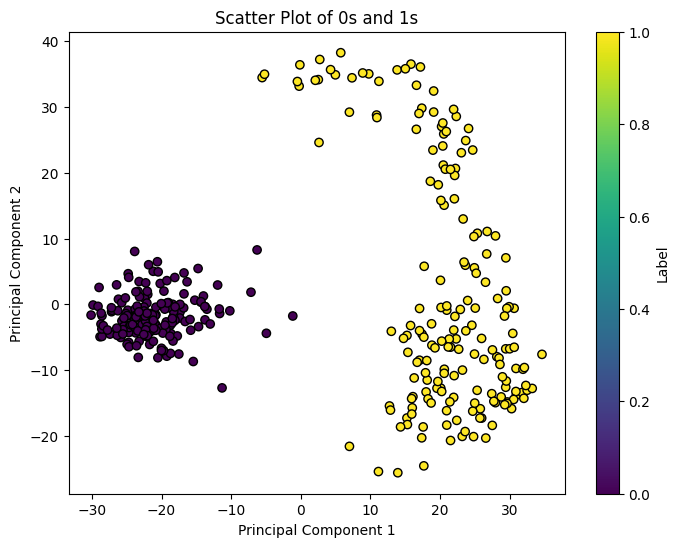

In [43]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_filtered)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels_filtered, cmap='viridis', marker='o', edgecolors='k')
plt.title('Scatter Plot of 0s and 1s')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

# Testing with other set of number

In [44]:
# Extract features (images) and labels
images, labels = mnist.data, mnist.target

# Convert labels to integers
labels = labels.astype(np.uint8)

# Filter the dataset to include only 0s and 1s
filter_mask = (labels == 5) | (labels == 6)

images_filtered = images[filter_mask]
labels_filtered = labels[filter_mask]

In [45]:
#labels for the perceptron we assume 1 is 6 and -1 is 5
labels_per = np.where(labels_filtered == 6, 1, -1)

In [47]:
weight = perceptron(images_filtered, labels_per)
weight

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
15
2
2
0
Number of errors each iteration: [15, 2, 2, 0]


array([  0.,  -6., -62., -11., -24., -58., -41.,   0.,   0., -36., -61.,
        -4., -41., -47., -18.,   0.,   0., -23.,  -3.,  36.,  -9.,  -7.,
        -1.,   0.,   0., -13., -12., -18., -24.,   3.,   3.,   0.,   0.,
        17.,  53.,  -2., -19., -10.,   1.,   0.,   0.,  12.,  94.,  58.,
       -14.,  16.,  30.,   0.,   0.,   1.,  50.,  28., -27.,  20.,  58.,
         2.,   0.,  -5., -58., -38.,  16.,  43.,  25.,   0.])

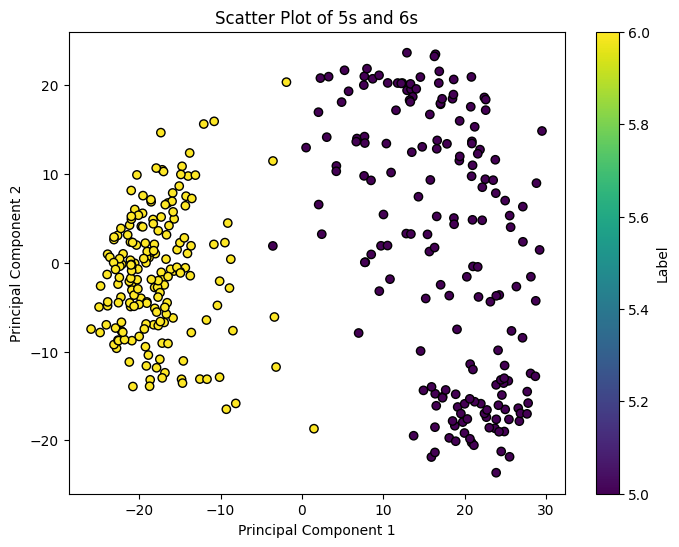

In [48]:
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_filtered)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels_filtered, cmap='viridis', marker='o', edgecolors='k')
plt.title('Scatter Plot of 5s and 6s')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

# Another set of MNIST

In [49]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data
y = mnist.target

c:\Users\tuanp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [58]:
feature = np.array(x)
feature

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [64]:
# Convert labels to integers
labels = y.astype(np.uint8)

# Filter the dataset to include only 0s and 1s
filter_mask = (labels == 0) | (labels == 1)

images_01 = feature[filter_mask]
labels_01 = labels[filter_mask]

In [65]:
images_01.shape

(14780, 784)

In [66]:
labels_01

1        0
3        1
6        1
8        1
14       1
        ..
69978    1
69983    0
69984    1
69993    0
69994    1
Name: class, Length: 14780, dtype: uint8

In [ ]:
weight = perceptron(images_01, labels_01)
weight

The number of error remain at 6903 for 15 minutes

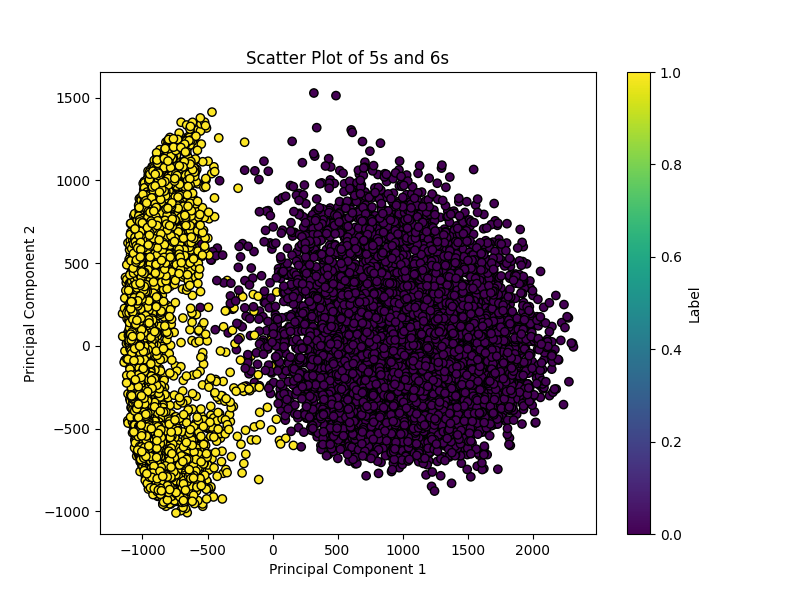

In [75]:
%matplotlib widget
# Apply PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
images_pca = pca.fit_transform(images_01)

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(images_pca[:, 0], images_pca[:, 1], c=labels_01, cmap='viridis', marker='o', edgecolors='k')
plt.title('Scatter Plot of 0s and 1s')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

We can see that it much harder to separate 0s and 1s in the original MNIST dataset